In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import os

import warnings

warnings.filterwarnings('ignore')

# Extract CSV zip files
if not os.path.isfile('mhealth_raw_data.csv'):
    with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

m_health_raw_data = pd.read_csv('mhealth_raw_data.csv')

In [16]:
# We see lowest category is 10342 samples
m_health_raw_data['Activity'].value_counts()

,count
Activity,
0,872550
1,30720
2,30720
3,30720
4,30720
9,30720
10,30720
11,30720
5,30720


In [17]:
# Let's sample 10000 entries for each category
# Drop the subject column
m_health_data = m_health_raw_data.drop('subject', axis=1)
seed=42

df = pd.DataFrame()
for i in m_health_data['Activity'].unique():
    samples = m_health_data[m_health_data['Activity'] == i].sample(random_state=seed, n=10000)
    df = pd.concat([df, samples])

ms = df.copy()
display(ms.head())

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
1212350,1.33590,-9.7394,-1.66110,0.58813,-0.58724,-0.662080,-3.2703,-9.05310,-0.30682,0.401960,-1.06160,0.14655,0
134482,2.52730,-12.7320,-3.88220,0.51763,-0.58537,-0.758350,-4.3463,-10.51300,1.71390,-0.272550,-0.76591,0.85129,0
820343,0.55205,-9.7466,1.58070,0.55288,-0.76173,-0.176820,-5.8155,-8.16430,-2.42900,0.137250,-0.99795,0.52155,0
718210,2.49960,-9.3680,1.81700,0.73655,-0.55159,0.068762,-3.0504,-5.91350,4.65220,0.084314,-0.71047,0.90086,0
118798,-3.48370,-9.2520,0.54423,-0.37662,-0.61163,0.609040,-6.5952,-0.79894,7.10590,-0.900000,1.14580,0.81897,0


In [18]:
print(ms['Activity'].value_counts())
display(ms.describe())

Activity
0     10000
1     10000
2     10000
3     10000
4     10000
6     10000
7     10000
8     10000
9     10000
10    10000
11    10000
12    10000
5     10000
Name: count, dtype: int64


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,130000.000000,130000.000000,130000.000000,130000.000000,130000.00000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000
mean,1.712190,-9.092605,-0.833864,0.081737,-0.56323,-0.137402,-3.520445,-5.656282,2.318159,-0.228825,-0.416495,0.358143,6.000000
std,4.431388,5.286531,6.568060,0.467020,0.41718,0.554810,6.041450,6.593481,4.251687,0.543354,0.544666,0.528319,3.741672
min,-22.146000,-19.609000,-19.365000,-1.777400,-7.78990,-2.622800,-22.345000,-18.972000,-18.230000,-2.219600,-3.552400,-2.504300,0.000000
25%,0.082362,-10.137000,-3.664900,-0.374770,-0.81051,-0.591360,-5.221425,-9.535500,0.051838,-0.696080,-0.839840,-0.077586,3.000000
50%,1.332000,-9.601300,0.261925,0.172540,-0.69043,-0.123770,-2.504100,-7.562000,1.776100,-0.333330,-0.597540,0.424570,6.000000
75%,2.892000,-7.492100,1.771100,0.484230,-0.49719,0.345780,-0.517068,-1.843100,5.181400,0.205880,-0.051335,0.829740,9.000000
max,20.033000,21.161000,25.005000,1.705000,1.97750,1.799600,19.801000,21.965000,25.741000,1.429400,1.540000,2.254300,12.000000


<Axes: >

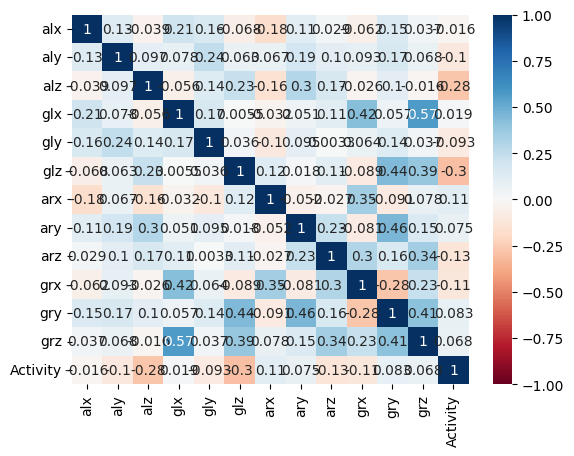

In [19]:
corr = ms.corr(method='spearman')
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [20]:
# feature expansion magnitude of acceleration
ms['Magnitude Left Acc'] = np.sqrt(ms['alx']**2 + ms['aly']**2 + ms['alz']**2)
ms['Magnitude Right Acc'] = np.sqrt(ms['arx']**2 + ms['ary']**2 + ms['arz']**2)
display(ms.columns)
display(ms.describe())

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'Magnitude Left Acc', 'Magnitude Right Acc'],
      dtype='object')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,Magnitude Left Acc,Magnitude Right Acc
count,130000.000000,130000.000000,130000.000000,130000.000000,130000.00000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000
mean,1.712190,-9.092605,-0.833864,0.081737,-0.56323,-0.137402,-3.520445,-5.656282,2.318159,-0.228825,-0.416495,0.358143,6.000000,12.194571,11.088392
std,4.431388,5.286531,6.568060,0.467020,0.41718,0.554810,6.041450,6.593481,4.251687,0.543354,0.544666,0.528319,3.741672,5.321501,4.985766
min,-22.146000,-19.609000,-19.365000,-1.777400,-7.78990,-2.622800,-22.345000,-18.972000,-18.230000,-2.219600,-3.552400,-2.504300,0.000000,0.537706,0.144361
25%,0.082362,-10.137000,-3.664900,-0.374770,-0.81051,-0.591360,-5.221425,-9.535500,0.051838,-0.696080,-0.839840,-0.077586,3.000000,9.752254,8.997784
50%,1.332000,-9.601300,0.261925,0.172540,-0.69043,-0.123770,-2.504100,-7.562000,1.776100,-0.333330,-0.597540,0.424570,6.000000,9.949205,9.794379
75%,2.892000,-7.492100,1.771100,0.484230,-0.49719,0.345780,-0.517068,-1.843100,5.181400,0.205880,-0.051335,0.829740,9.000000,12.261475,11.498591
max,20.033000,21.161000,25.005000,1.705000,1.97750,1.799600,19.801000,21.965000,25.741000,1.429400,1.540000,2.254300,12.000000,38.929267,40.500573


<Axes: >

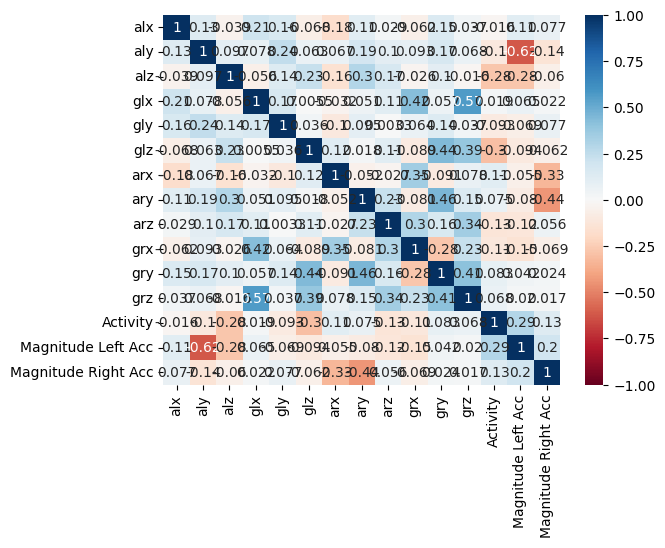

In [21]:
corr = ms.corr(method='spearman')
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def GenerateReport(model, X_train, X_test, y_train, y_test):
    # Checking training error
    y_train_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    class_report = classification_report(y_train, y_train_pred)

    # Printing accuracy, precision, and recall
    print("Train Accuracy:", accuracy)
    print("Train Classification Report:")
    print(class_report)

    # Checking testing error
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    print("Test Accuracy:", accuracy)
    print("Test Classification Report:")
    print(class_report)

In [27]:
## Activity n Predictions Classification
for i in range(13):
    print("This is Activity " + str(i) + "'s prediction -----------------------------")
    # Separate the data
    activity = ms[ms['Activity'] == i]
    not_activity = ms[ms['Activity'] != i]

    activity['Activity'] = 1
    not_activity['Activity'] = 0

    # Shuffle the remaining data so it includes all the other activites
    shuffled_remaining_data = not_activity.sample(frac=1, random_state=seed).reset_index(drop=True)

    # Combine half of data with half of shuffled remaining data
    half_remaining = shuffled_remaining_data.sample(frac=1/12, random_state=seed)

    # Concatenate the two halves
    final_df = pd.concat([activity, half_remaining]).reset_index(drop=True)

    # We have a dataset with 10000 entries of activity i and 10000 of non-activity i
    # i encoded as 1, non-i encoded as 0

    X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['Activity'], axis = 1), final_df['Activity'], test_size=0.2, random_state=seed)

    # Scale the input data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    log_reg_model = LogisticRegression(max_iter=1000)

    # Fitting the model to the training data
    log_reg_model.fit(X_train, y_train)

    GenerateReport(log_reg_model, X_train, X_test, y_train, y_test)



This is Activity 0's prediction -----------------------------
Train Accuracy: 0.609375
Train Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.59      8019
           1       0.60      0.66      0.63      7981

    accuracy                           0.61     16000
   macro avg       0.61      0.61      0.61     16000
weighted avg       0.61      0.61      0.61     16000

Test Accuracy: 0.58425
Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.23      0.36      1981
           1       0.55      0.93      0.69      2019

    accuracy                           0.58      4000
   macro avg       0.66      0.58      0.52      4000
weighted avg       0.66      0.58      0.53      4000

This is Activity 1's prediction -----------------------------
Train Accuracy: 0.915625
Train Classification Report:
              precision    recall  f1-score   support

        

This is Activity 0's fitting graph


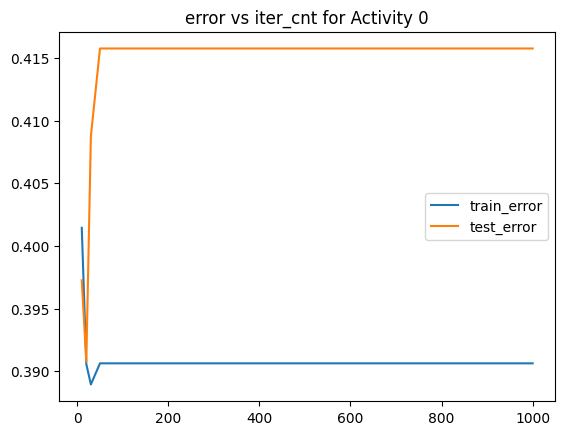

This is Activity 1's fitting graph


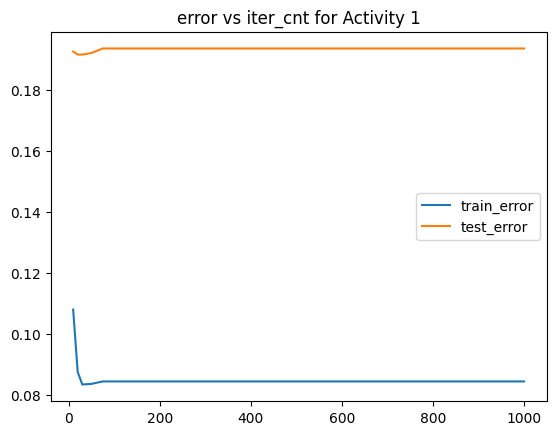

This is Activity 2's fitting graph


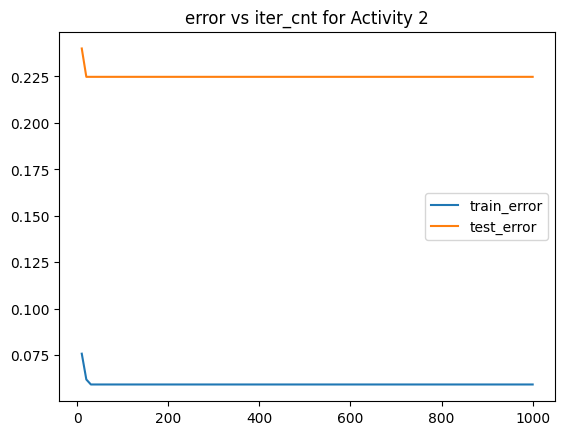

This is Activity 3's fitting graph


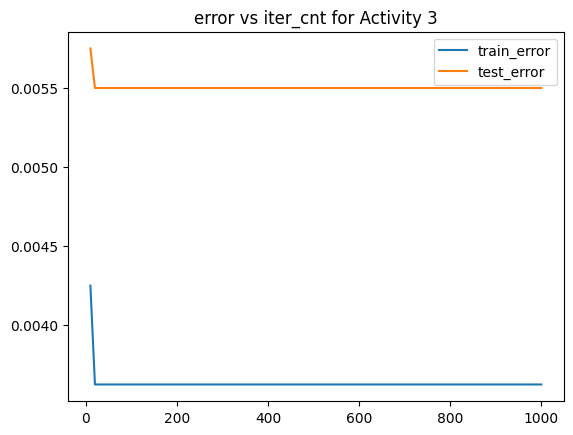

This is Activity 4's fitting graph


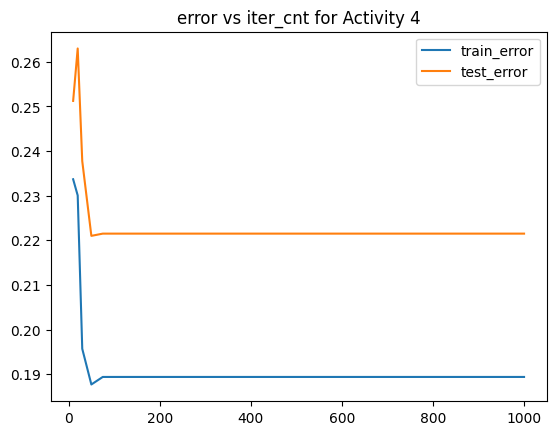

This is Activity 5's fitting graph


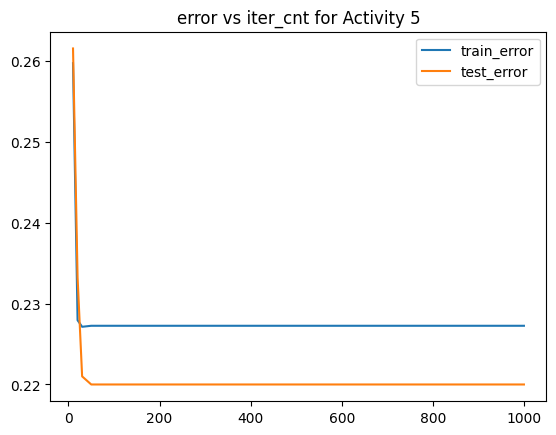

This is Activity 6's fitting graph


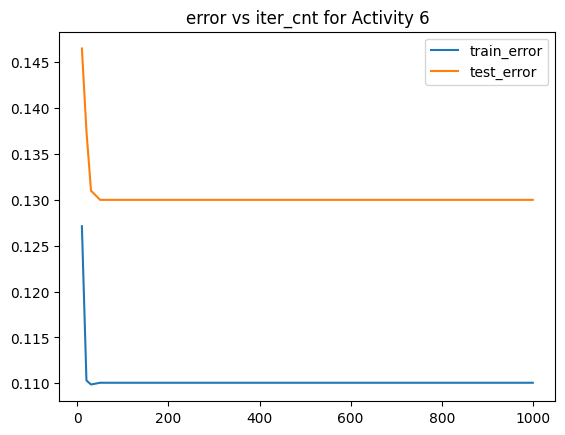

This is Activity 7's fitting graph


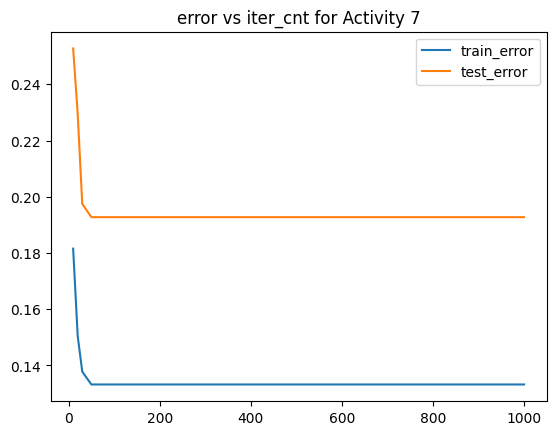

This is Activity 8's fitting graph


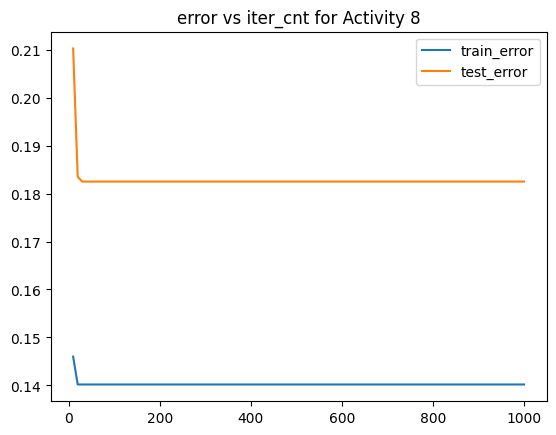

This is Activity 9's fitting graph


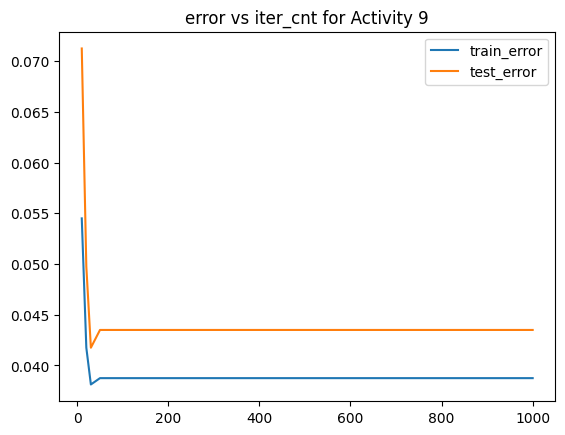

This is Activity 10's fitting graph


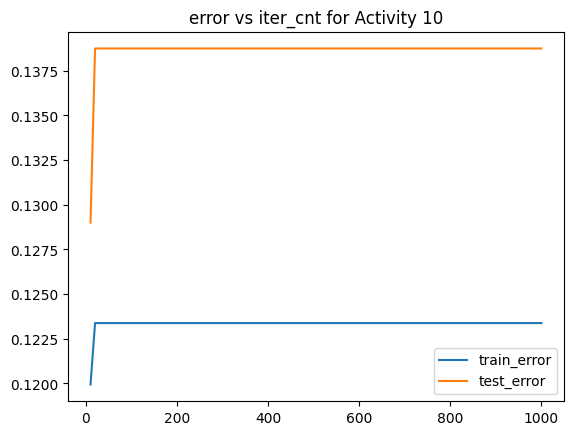

This is Activity 11's fitting graph


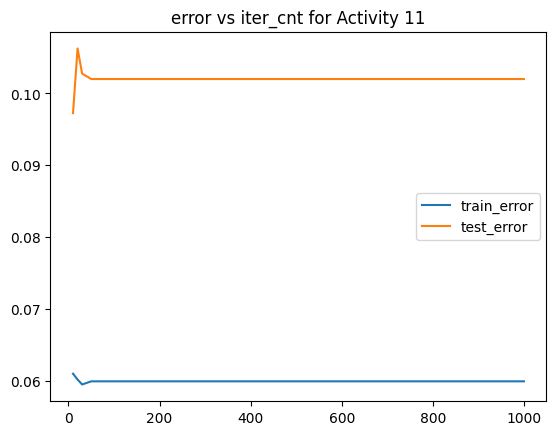

This is Activity 12's fitting graph


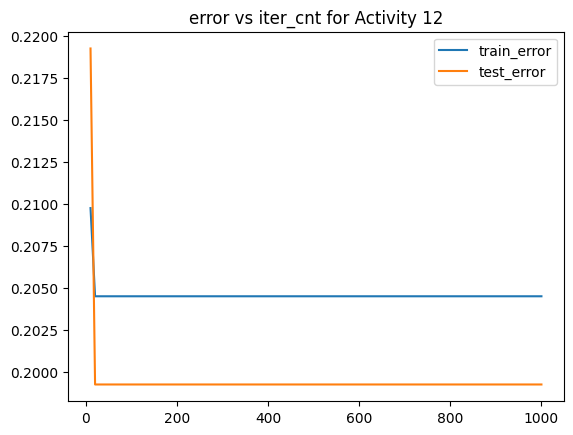

In [28]:
import matplotlib.pyplot as plt

## Activity n Predictions Fitting Graphs (based iteration count)
# (Same as above loop for creating the final df and scaling)
iter_cnt = [10, 20, 30, 50, 75, 100, 500, 1000]
for i in range(13):
    print("This is Activity " + str(i) + "'s fitting graph")
    # Separate the data
    activity = ms[ms['Activity'] == i]
    not_activity = ms[ms['Activity'] != i]

    activity['Activity'] = 1
    not_activity['Activity'] = 0

    # Shuffle the remaining data so it includes all the other activites
    shuffled_remaining_data = not_activity.sample(frac=1, random_state=seed).reset_index(drop=True)

    # Combine half of data with half of shuffled remaining data
    half_remaining = shuffled_remaining_data.sample(frac=1/12, random_state=seed)

    # Concatenate the two halves
    final_df = pd.concat([activity, half_remaining]).reset_index(drop=True)

    # We have a dataset with 10000 entries of activity i and 10000 of non-activity i
    # i encoded as 1, non-i encoded as 0

    X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['Activity'], axis = 1), final_df['Activity'], test_size=0.2, random_state=seed)

    # Scale the input data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    test_error = []
    train_error = []
    for ic in iter_cnt:

        log_reg_model = LogisticRegression(max_iter=ic)

        # Fitting the model to the training data
        log_reg_model.fit(X_train, y_train)

        y_train_pred = log_reg_model.predict(X_train)
        train_error.append(1 - accuracy_score(y_train, y_train_pred))

        y_test_pred = log_reg_model.predict(X_test)
        test_error.append(1 - accuracy_score(y_test, y_test_pred))

    plt.plot(iter_cnt, train_error, label="train_error")
    plt.plot(iter_cnt, test_error, label="test_error")
    plt.legend()
    plt.title("error vs iter_cnt for Activity " + str(i))
    plt.show()
